In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import *
from scipy import integrate

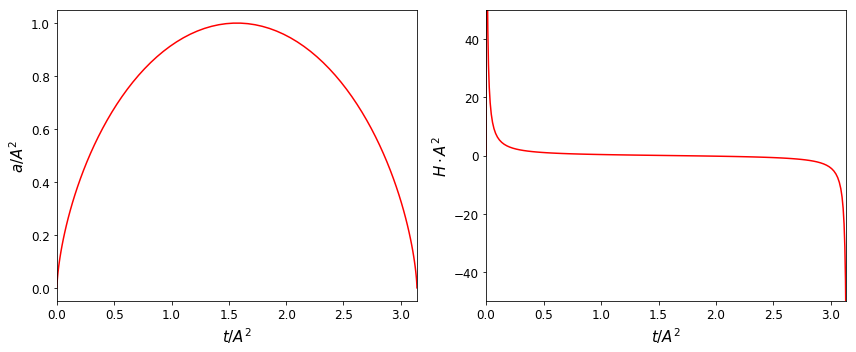

In [2]:
# 第4题：a与H的演化

# 计算
N = 100   # 采点个数
phi = np.linspace(0, 2*math.pi, N)   # phi角
t = []   # 时间
a = []   # 标度因子
H = []   # 哈勃常数
for i in range(len(phi)):
    if i==0 :
        t.append( 0.5*(phi[i]-math.sin(phi[i])) )
        a.append( (math.sin(0.5*phi[i]))**2 )
        H.append(0)
    elif i==(N-1) :
        t.append( 0.5*(phi[i]-math.sin(phi[i])) )
        a.append( (math.sin(0.5*phi[i]))**2 )
        H.append(0)
    else:
        t.append( 0.5*(phi[i]-math.sin(phi[i])) )
        a.append( (math.sin(0.5*phi[i]))**2 )
        H.append( (1/math.tan(0.5*phi[i]))/((math.sin(0.5*phi[i]))**2) )
    
# 作图
fig = plt.figure(figsize=(12, 5))

ax1=plt.subplot(121)
ax1.plot(t, a, c='r')
ax1.set_xlabel(r'$t/A^2$',fontsize=15)
ax1.set_ylabel(r'$a/A^2$',fontsize=15)
ax1.set_xlim(0,math.pi)
ax1.tick_params(labelsize=12)

ax2=plt.subplot(122)
ax2.plot(t, H, c='r')
ax2.set_xlabel(r'$t/A^2$',fontsize=15)
ax2.set_ylabel(r'$H\cdot A^2$',fontsize=15)
ax2.set_xlim(0,math.pi-0.01)
ax2.set_ylim(-50,50)
ax2.tick_params(labelsize=12)

fig.tight_layout()
plt.show()

辐射密度： 9.162583981153778e-05
物质-辐射相等时红移： [-1.00000000000000, 3436.89481927711]
物质-常数相等时红移： [0.295567383460953, -1.64778369173048 - 1.12199426639172*I, -1.64778369173048 + 1.12199426639172*I]
辐射-常数相等时红移： [-10.2986125218784, 8.29861252187837, -1.0 - 9.29861252187837*I, -1.0 + 9.29861252187837*I]


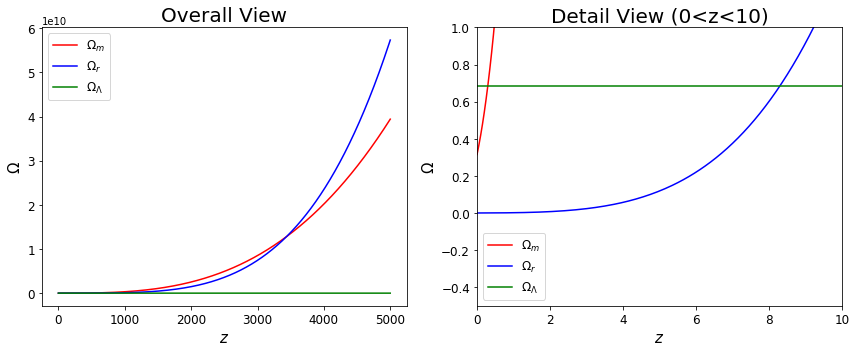

In [3]:
# 第5题：各成分演化

# 参数
H0 = 67.3   # 哈勃常数
Omega_m0 = 0.315   # 物质密度
Omega_A0 = 0.685   # 宇宙学常数
T0 = 2.725   # 微波背景辐射温度
Omega_r0 = 4.15*(10**(-5))/(0.673**2)   # 辐射密度
print('辐射密度：', Omega_r0)

# 主导成分改变处相应红移
z = symbols('z')
z_mr = solve(Omega_m0*((1+z)**3) - Omega_r0*((1+z)**4), z)
print('物质-辐射相等时红移：', z_mr)
z_mA = solve(Omega_m0*((1+z)**3) - Omega_A0, z)
print('物质-常数相等时红移：', z_mA)
z_rA = solve(Omega_A0 - Omega_r0*((1+z)**4), z)
print('辐射-常数相等时红移：', z_rA)

# 作图
N = 100000
z = np.linspace(0, 5000, N)
Omega_m = []
Omega_r = []
Omega_A = [] 
for i in range(len(z)):
    Omega_m.append(Omega_m0*((1+z[i])**3))
    Omega_r.append(Omega_r0*((1+z[i])**4))
    Omega_A.append(Omega_A0)
    
fig = plt.figure(figsize=(12, 5))

ax1=plt.subplot(121)
ax1.plot(z, Omega_m, c='r', label=r'$\Omega_m$')
ax1.plot(z, Omega_r, c='b', label=r'$\Omega_r$')
ax1.plot(z, Omega_A, c='g', label=r'$\Omega_{\Lambda}$')
ax1.set_xlabel(r'$z$',fontsize=15)
ax1.set_ylabel(r'$\Omega$', fontsize=15)
ax1.legend(fontsize=12)
ax1.set_title('Overall View', fontsize=20)
ax1.tick_params(labelsize=12)

ax2=plt.subplot(122)
ax2.plot(z, Omega_m, c='r', label=r'$\Omega_m$')
ax2.plot(z, Omega_r, c='b', label=r'$\Omega_r$')
ax2.plot(z, Omega_A, c='g', label=r'$\Omega_{\Lambda}$')
ax2.set_xlabel(r'$z$', fontsize=15)
ax2.set_ylabel(r'$\Omega$', fontsize=15)
ax2.set_xlim(0,10)
ax2.set_ylim(-0.5,1)
ax2.legend(fontsize=12)
ax2.set_title('Detail View (0<z<10)', fontsize=20)
ax2.tick_params(labelsize=12)

fig.tight_layout()
plt.show()

F:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


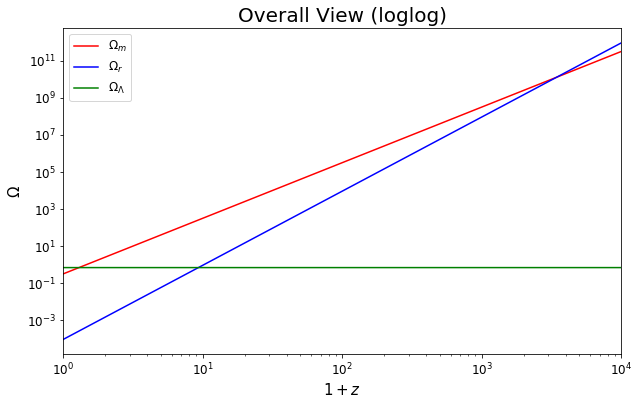

In [4]:
# 对数坐标作图

N = 200000
z = np.linspace(0, 10000, N)
Omega_m = []
Omega_r = []
Omega_A = [] 
zp = []   # z+1
for i in range(len(z)):
    zp.append(z[i]+1)
    Omega_m.append(Omega_m0*((1+z[i])**3))
    Omega_r.append(Omega_r0*((1+z[i])**4))
    Omega_A.append(Omega_A0)
    
fig = plt.figure(figsize=(10, 6))
ax1=plt.subplot(111)
ax1.loglog()
ax1.plot(zp, Omega_m, c='r', label=r'$\Omega_m$')
ax1.plot(zp, Omega_r, c='b', label=r'$\Omega_r$')
ax1.plot(zp, Omega_A, c='g', label=r'$\Omega_{\Lambda}$')
ax1.set_xlabel(r'$1+z$',fontsize=15)
ax1.set_ylabel(r'$\Omega$', fontsize=15)
ax1.set_xlim(0,10**4)
ax1.legend(fontsize=12)
ax1.set_title('Overall View (loglog)', fontsize=20)
ax1.tick_params(labelsize=12)
plt.show()

In [5]:
# 求各种距离

H0 = 67.3   # 哈勃常数
Omega_m0 = 0.044   # 物质密度
Omega_A0 = 0.956   # 宇宙学常数
z1 = 10

def H_rec(z):   # 积分内函数1/H
    return 1/(( (Omega_m0*((1+z)**3)) + Omega_A0 )**0.5 * H0)
d_c = integrate.quad(H_rec, 0, z1)[0]   # 共动距离
d_p = d_c / (1+z1)   # 固有距离
d_A = d_c / (1+z1)   # 角距离
d_L = d_A * (1+z1)**2

print('自然单位制')
print('共动距离：d_c =', d_c)
print('固有距离：d_p =', d_p)
print('角距离：d_A =', d_A)
print('光度距离：d_L =', d_L)
print('普通单位制')
print('共动距离：d_c =', d_c*3e5)
print('固有距离：d_p =', d_p*3e5)
print('角距离：d_A =', d_A*3e5)
print('光度距离：d_L =', d_L*3e5)

自然单位制
共动距离：d_c = 0.061143203997416844
固有距离：d_p = 0.0055584730906742584
角距离：d_A = 0.0055584730906742584
光度距离：d_L = 0.6725752439715853
普通单位制
共动距离：d_c = 18342.961199225054
固有距离：d_p = 1667.5419272022775
角距离：d_A = 1667.5419272022775
光度距离：d_L = 201772.5731914756


In [6]:
print('两个星系间')
print('共动距离：d_c\' =', 2*d_c*3e5)
print('固有距离：d_p\' =', 2*d_p*3e5)

两个星系间
共动距离：d_c' = 36685.92239845011
固有距离：d_p' = 3335.083854404555


In [19]:
z1 = 0.2
z2 = 2
H0 = 70

def H_rec(z):   # 积分内函数1/H
    return 1/(( (((1+z)**3))  )**0.5 * H0)
d_c = integrate.quad(H_rec, 0, z1)[0]   # 共动距离
d_p = d_c / (1+z1)   # 固有距离
print('共动距离：d_c\' =', 2*d_c*3e5)
print('固有距离：d_p\' =', 2*d_p*3e5)

d_c = integrate.quad(H_rec, 0, z2)[0]   # 共动距离
d_p = d_c / (1+z2)   # 固有距离
print('共动距离：d_c\' =', 2*d_c*3e5)
print('固有距离：d_p\' =', 2*d_p*3e5)

共动距离：d_c' = 1493.6412141381115
固有距离：d_p' = 1244.7010117817597
共动距离：d_c' = 7245.423956749273
固有距离：d_p' = 2415.141318916424


In [21]:
z = 1
Mpc = 3.08567758 * (10**22)  #(m)
a = (0.3*((1+z)**3)+0.7)**1.5 *70
a1 = a/((10**5 *3) * Mpc)

print(a)
print(a1)
#print(1/a1)

382.06792589800045
4.1273260733654965e-26
